# **Introdução**

Alunos: Lucas Vanderlinde,
        Hugo Marcel Larsen,
        Eduardo Zunino Feller

O intuito do trabalho é utilizar o aprendizado supervisionado para treinar o classificador SVM (Support Vector Machine) para realizar a previsão correta da classificação da qualidade do tipo de vinho tinto.

A qualidade é indicada por um score de 0 á 10. 

*   0 - 4: Vinho tinto ruim
*   5 - 6: Vinho tinto médio
*   7 - 8: Vinho tinto bom



#Carregando o conjunto de dados

In [202]:
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder


arquivo = pd.read_csv("/content/drive/My Drive/Colab Notebooks/winequality-red.csv")

Aqui é possível a visualização do arquivo utilizado como base de dados

In [203]:
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Agrupamento

Aqui agruparemos a escala de qualidade em três valores ruim, médio, bom.

In [204]:
bins = (2, 4, 6, 8)
group_names = ['ruim', 'médio', 'bom']
arquivo['quality'] = pd.cut(arquivo['quality'], bins = bins, labels = group_names)

label_type = LabelEncoder()

arquivo['quality'] = label_type.fit_transform(arquivo['quality'])

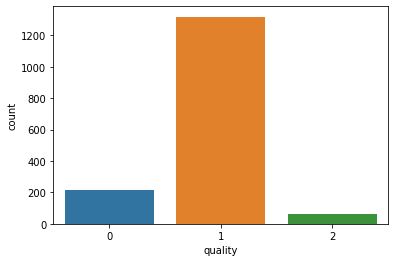

In [205]:
import seaborn as sns

sns.countplot(arquivo['quality'])

# Divisão em dois conjuntos

Primeiramente é necessário, separar a coluna quality para o classificador treinar e respectivamente testar.

Obs.: a função drop aqui é a responsável por remover e o parâmetro *axis = 1* indica que será uma coluna.

Ao finalizar essa a execução desse trecho y terá apenas os valores da coluna quality e x terá toda a tabela menos a coluna quality.

In [206]:
y = arquivo['quality']
x = arquivo.drop('quality', axis = 1)

Aqui separamos o que será teste e o que será treino utilizando a função *train_test_split*. Setamos com o parâmetro *test_size* que queremos que 30% dos dados seja separado para teste e os outros 70% serão treino.

In [207]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

#Support Vector Machine (SVM)

Primeiro instânciamos o SVC (Support Vector Classification).

Utilizamos a função fit para a realização do treino, passando o conjunto de treino.

A função score é responsável por testar cada um dos dados do conjunto de teste e validar se acertou ou errou, o resultado será a taxa de acerto da classificação.

In [208]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_treino, y_treino)
resultadoSVC = svc.score(x_teste, y_teste)
print("Acurácia:", resultadoSVC)

Acurácia: 0.8166666666666667


Realizando um teste de predição separamos um conjunto de dados de 5 valores.

In [209]:
y_teste[0:5]

645     0
191     1
1139    1
1538    1
1471    1
Name: quality, dtype: int64

Podemos verificar que a previsão indicou os vinhos de qualidade mediana corretamente mas errou no vinho de qualidade ruim.

In [210]:
predicaoSVC = svc.predict(x_teste[0:5])
predicaoSVC

array([1, 1, 1, 1, 1])

# Multi-layer Perceptron (MLP)

Utilizando o modelo de classificação MLP, obtivemos uma acurácia maior que o SVM.

In [211]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_treino, y_treino)

resultadoMLP = mlp.score(x_teste, y_teste)
print("Acurácia:", resultadoMLP)

Acurácia: 0.8208333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Utilizando o mesmo conjunto de dados para previsão podemos verificar que o modelo MLP conseguiu prever corretamente todo o conjunto enquando o SVM errou uma das previsões.

In [212]:
predicaoMLP = svc.predict(x_teste[0:5])
predicaoMLP

array([1, 1, 1, 1, 1])